In [ ]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 193kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import os
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import sklearn
print(sklearn.__version__)

0.24.2


In [ ]:
lemmatizer = WordNetLemmatizer()
def preprocess_review(review):
    soup = BeautifulSoup(review, "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    review = [word.strip() for word in review if word not in set(stopwords.words('english'))]
    review = [lemmatizer.lemmatize(word) for word in review]
    return " ".join(review)

In [ ]:
# data["review"] = data["review"].apply(preprocess_review)

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Recommendation_HUB/Movie_Reviews/cleaned_and_lemmatized.csv"
data = pd.read_csv(DATA_PATH)

In [ ]:
data.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1


In [ ]:
data=data.sample(2000)

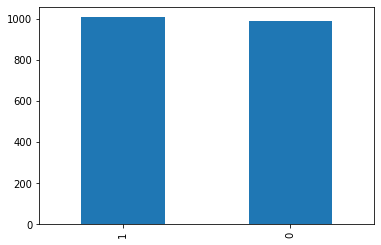

In [ ]:
data["sentiment"].value_counts().plot(kind="bar")
plt.show()

In [ ]:
reviews = data["review"].values
sentiments = data["sentiment"].values
reviews.shape, sentiments.shape

((2000,), (2000,))

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size = 0.2, random_state = 24)
X_train.shape, y_train.shape

((1600,), (1600,))

In [ ]:
tf_idf = TfidfVectorizer(ngram_range=(1,3))
X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)
X_train.shape, X_test.shape

((1600, 342470), (400, 342470))

In [ ]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)
preds = mnb_model.predict(X_test)
print(accuracy_score(y_test, preds))
confusion_matrix(y_test, preds)

0.835


array([[167,  35],
       [ 31, 167]])

In [ ]:
tf_idf = TfidfVectorizer(ngram_range=(1,3))
X = tf_idf.fit_transform(reviews)

In [ ]:
mnb_model = MultinomialNB()
mnb_model.fit(X, sentiments)
preds = mnb_model.predict(X)
print(accuracy_score(sentiments, preds))
confusion_matrix(sentiments, preds)

1.0


array([[ 992,    0],
       [   0, 1008]])

In [ ]:
X.shape

(2000, 427453)

In [ ]:
import pickle

In [ ]:
pickle.dump(mnb_model, open("sentiment_classifier.pkl", "wb"))
pickle.dump(tf_idf, open("tf_idf.pkl", "wb"))

In [ ]:
mnb_model.predict(X[0])[0]

0

In [ ]:
sentiments[0]

0

In [ ]:
X[0].shape

(1, 427453)